# Parameters

In [115]:
dataset_name = 'codex-m'

symbolic_name = 'AnyBURL'
symbolic = 'anyburl'

subsymbolic_name = 'ComplEx'
subsymbolic = 'complex'

bp_threshold = 5
relation_classes_threshold = 0.7

# Imports

In [116]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

# Load Data

In [117]:
df = get_prediction_data(dataset_name, symbolic, subsymbolic)
df.head(10)

,h_id,r_id,t_id,predicted_head,rank_filtered_anyburl,h,r,t,rank_filtered_kge,rank_filtered_0,rank_filtered_1,rank_filtered_2,rank_filtered_3
0,1742,1,4570,True,63.0,Q854,P463,Q7785,19.25,27,31,6,13
1,1742,1,4570,False,7.0,Q854,P463,Q7785,2.25,2,2,2,3
2,13857,1,2933,True,252.0,Q4149437,P463,Q2370801,47.50,66,37,31,56
3,13857,1,2933,False,4.0,Q4149437,P463,Q2370801,1.00,1,1,1,1
4,3919,11,39,True,6960.0,Q73437,P1412,Q1860,1013.75,1111,1649,1187,108
5,3919,11,39,False,1.0,Q73437,P1412,Q1860,1.00,1,1,1,1
6,1211,2,7345,True,3726.0,Q355447,P106,Q6430706,45.25,126,6,8,41
7,1211,2,7345,False,68.0,Q355447,P106,Q6430706,24.75,33,22,17,27
8,14262,2,337,True,614.0,Q95076,P106,Q10798782,871.00,1236,1701,190,357
9,14262,2,337,False,2.0,Q95076,P106,Q10798782,2.00,2,2,2,2


In [118]:
df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge']]
df.head(10)

,h_id,r_id,t_id,predicted_head,rank_filtered_anyburl,rank_filtered_kge
0,1742,1,4570,True,63.0,19.25
1,1742,1,4570,False,7.0,2.25
2,13857,1,2933,True,252.0,47.50
3,13857,1,2933,False,4.0,1.00
4,3919,11,39,True,6960.0,1013.75
5,3919,11,39,False,1.0,1.00
6,1211,2,7345,True,3726.0,45.25
7,1211,2,7345,False,68.0,24.75
8,14262,2,337,True,614.0,871.00
9,14262,2,337,False,2.0,2.00


## drop NAs (why are there NAs at all?)

In [119]:
len(df)

20622

In [120]:
df['rank_filtered_anyburl'].isnull().sum()

592

In [121]:
df['rank_filtered_kge'].isnull().sum()

0

In [122]:
df = df.dropna()

In [123]:
len(df)

20030

# Analysis

## create PDF

In [124]:
pdf = PdfPages(f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf')

## show graphs

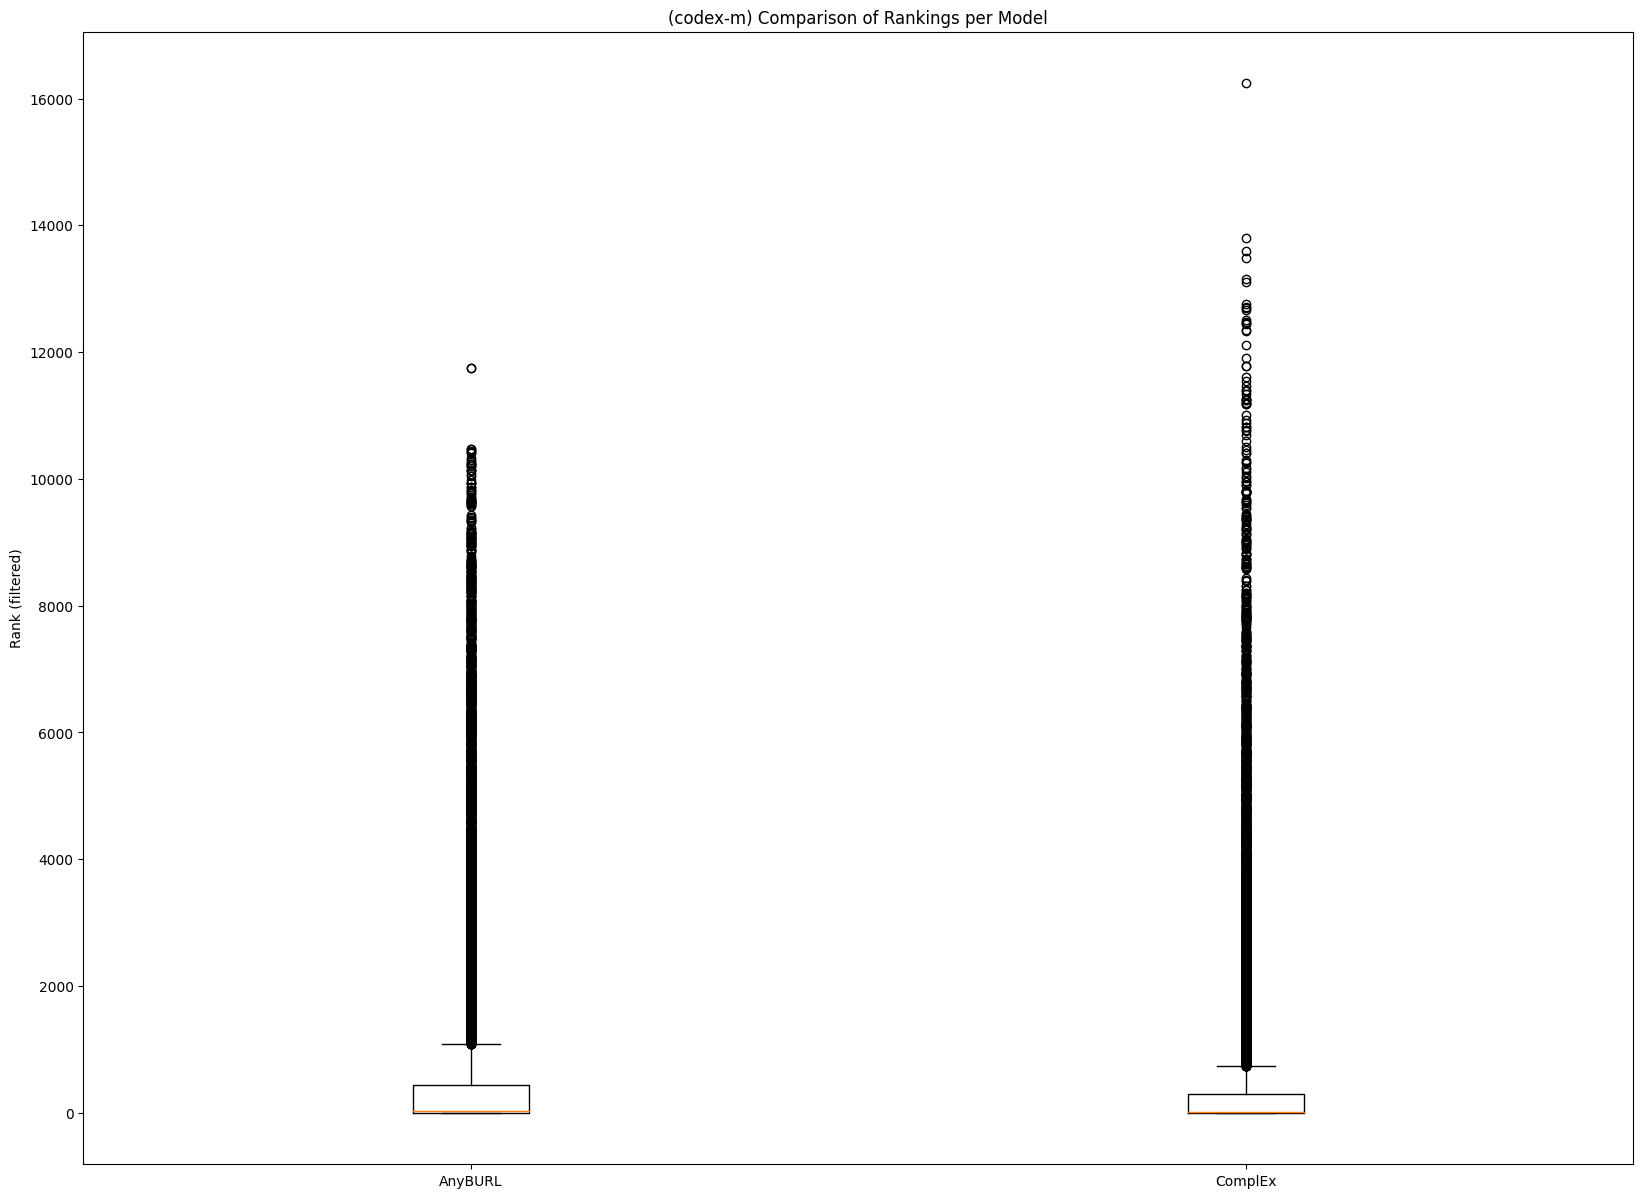

In [125]:
show_ranking_dist(df)

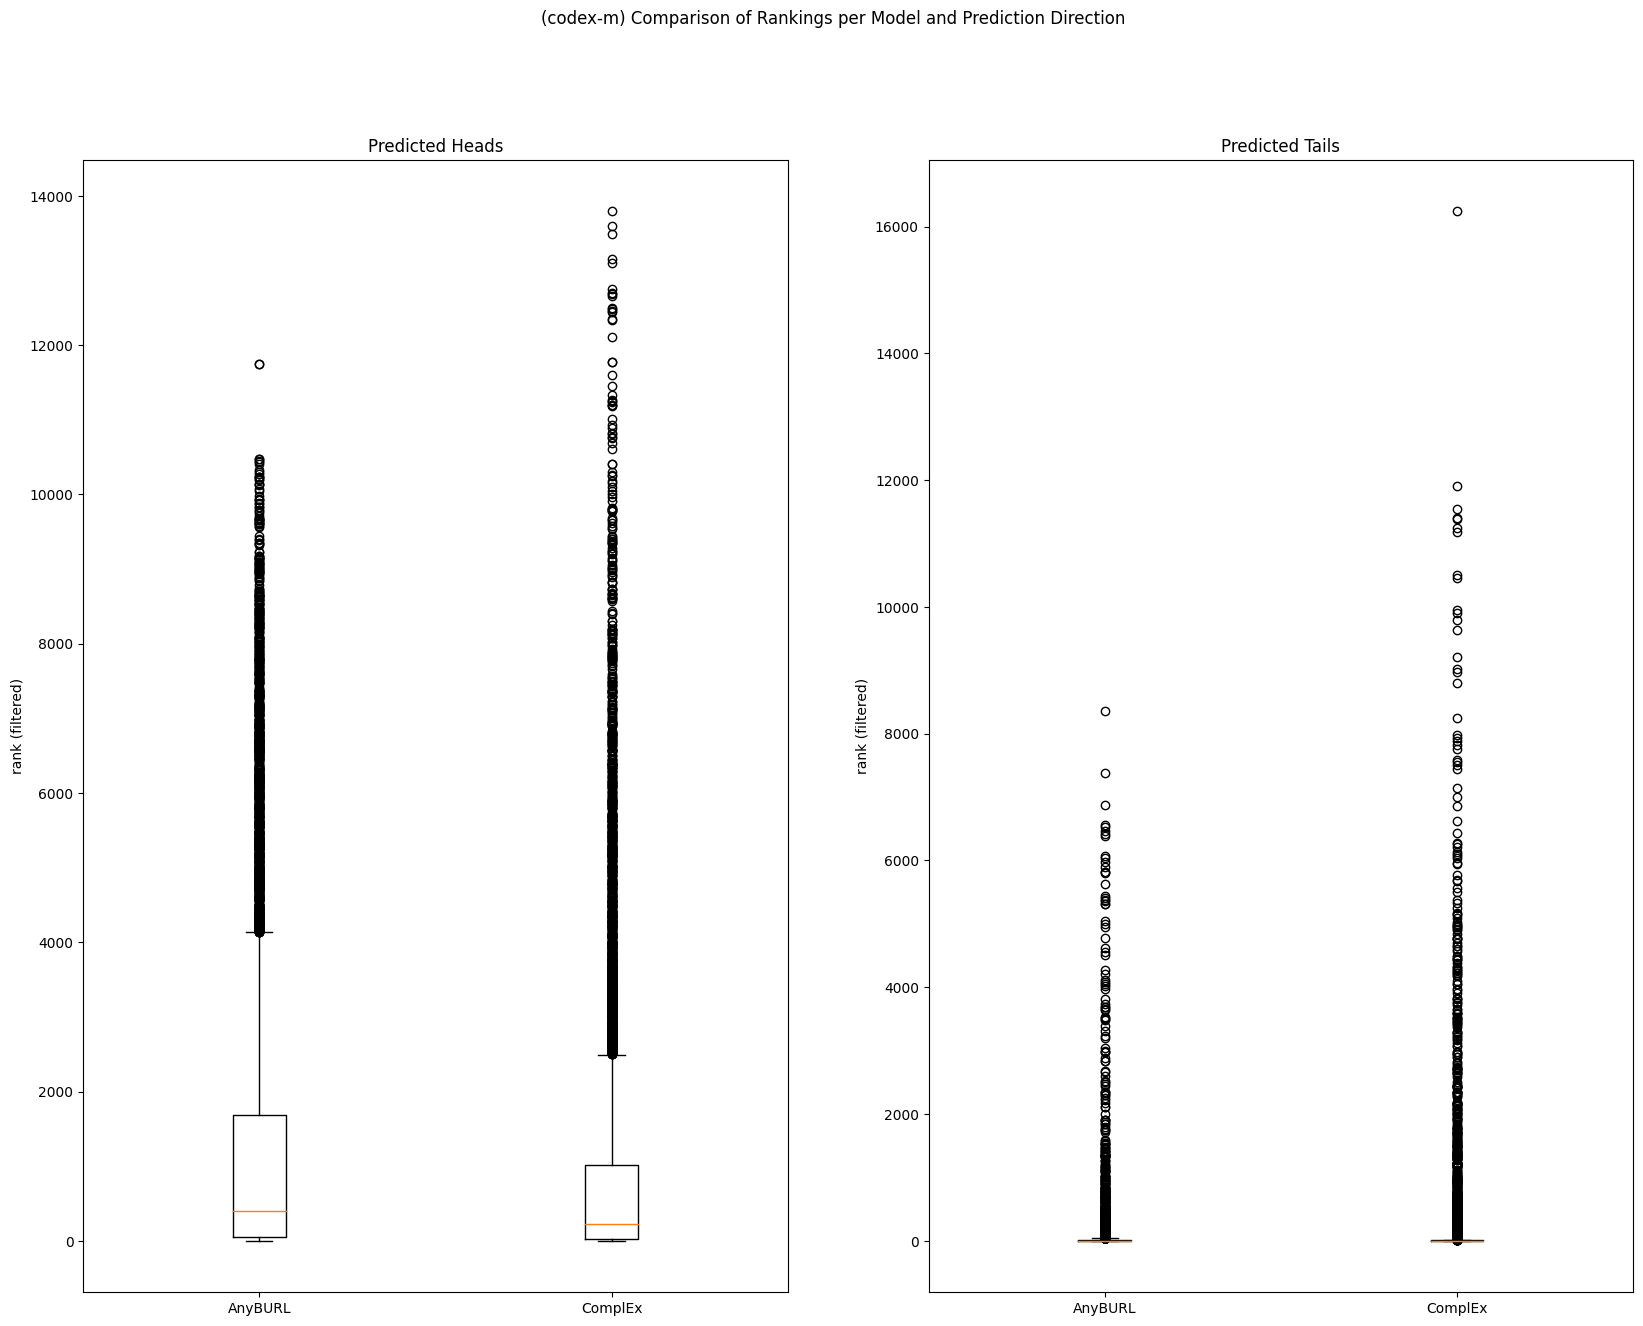

In [126]:
show_ranking_dist_by_direction(df)

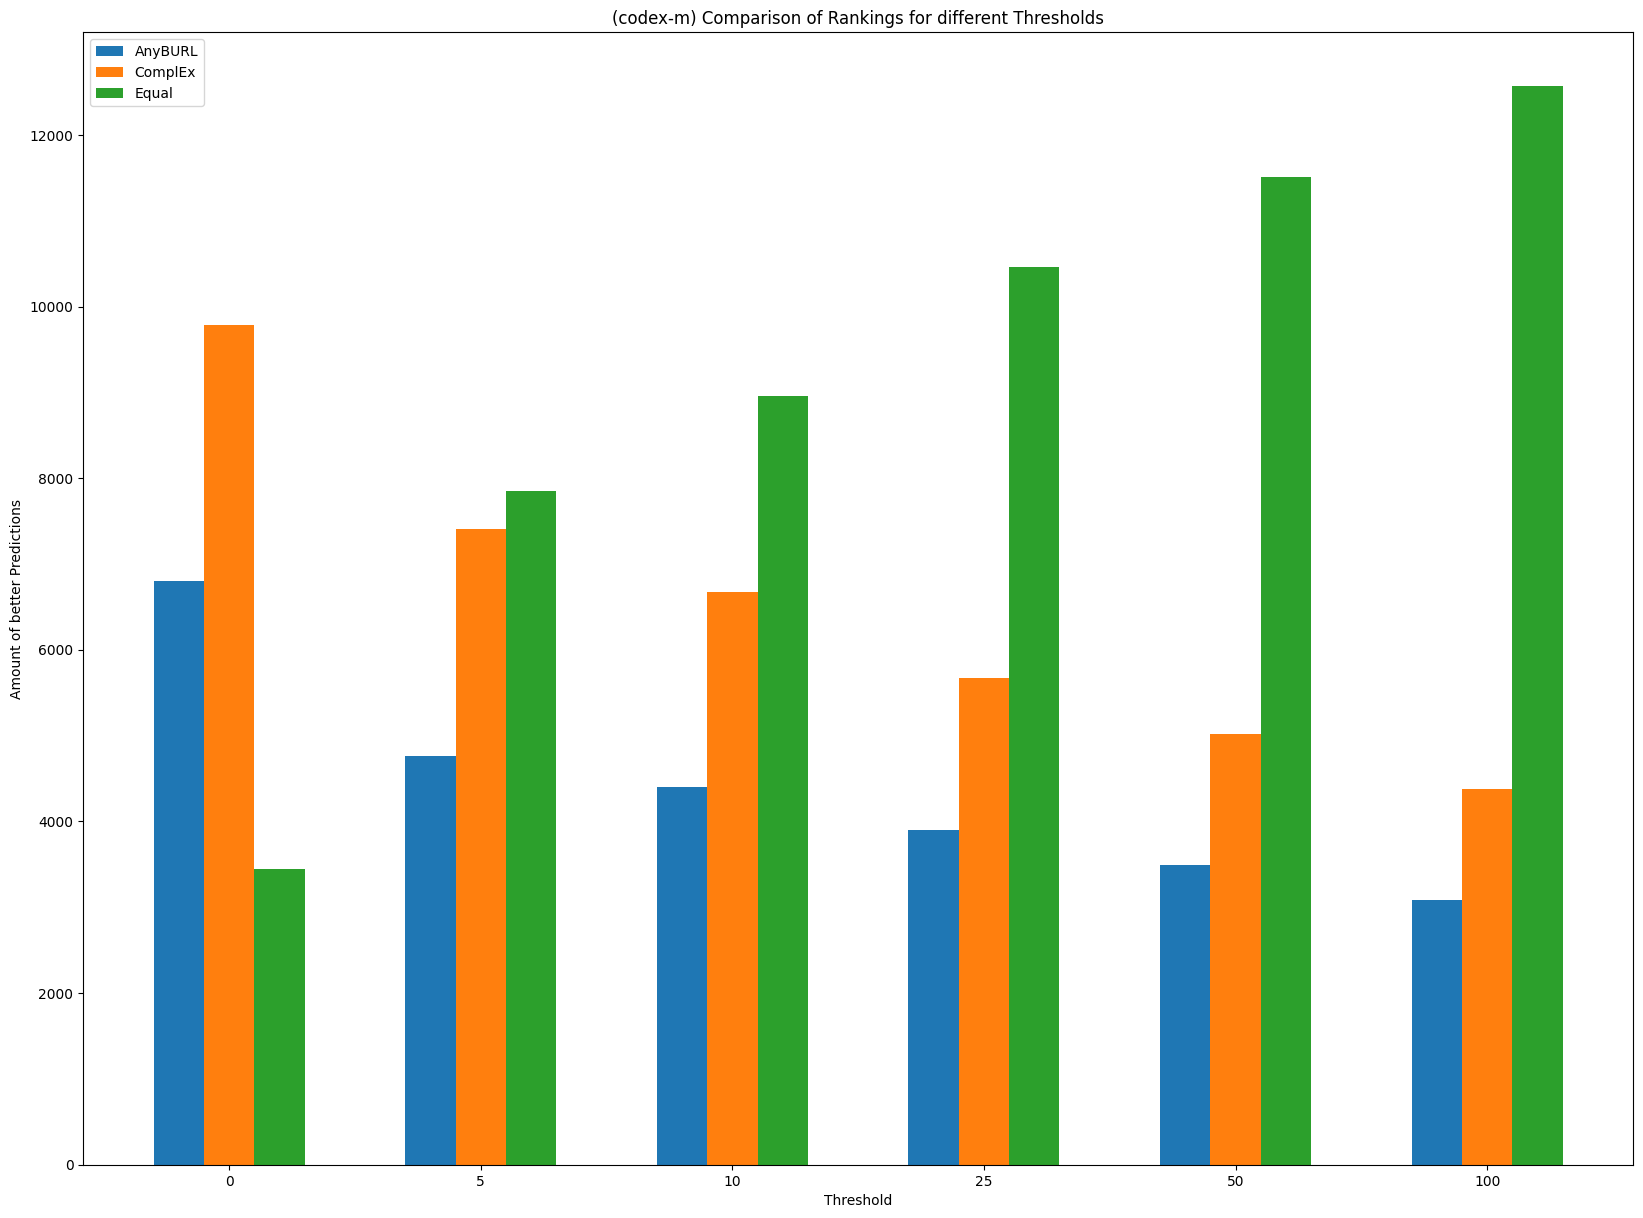

In [127]:
show_performance_different_thresholds(df)

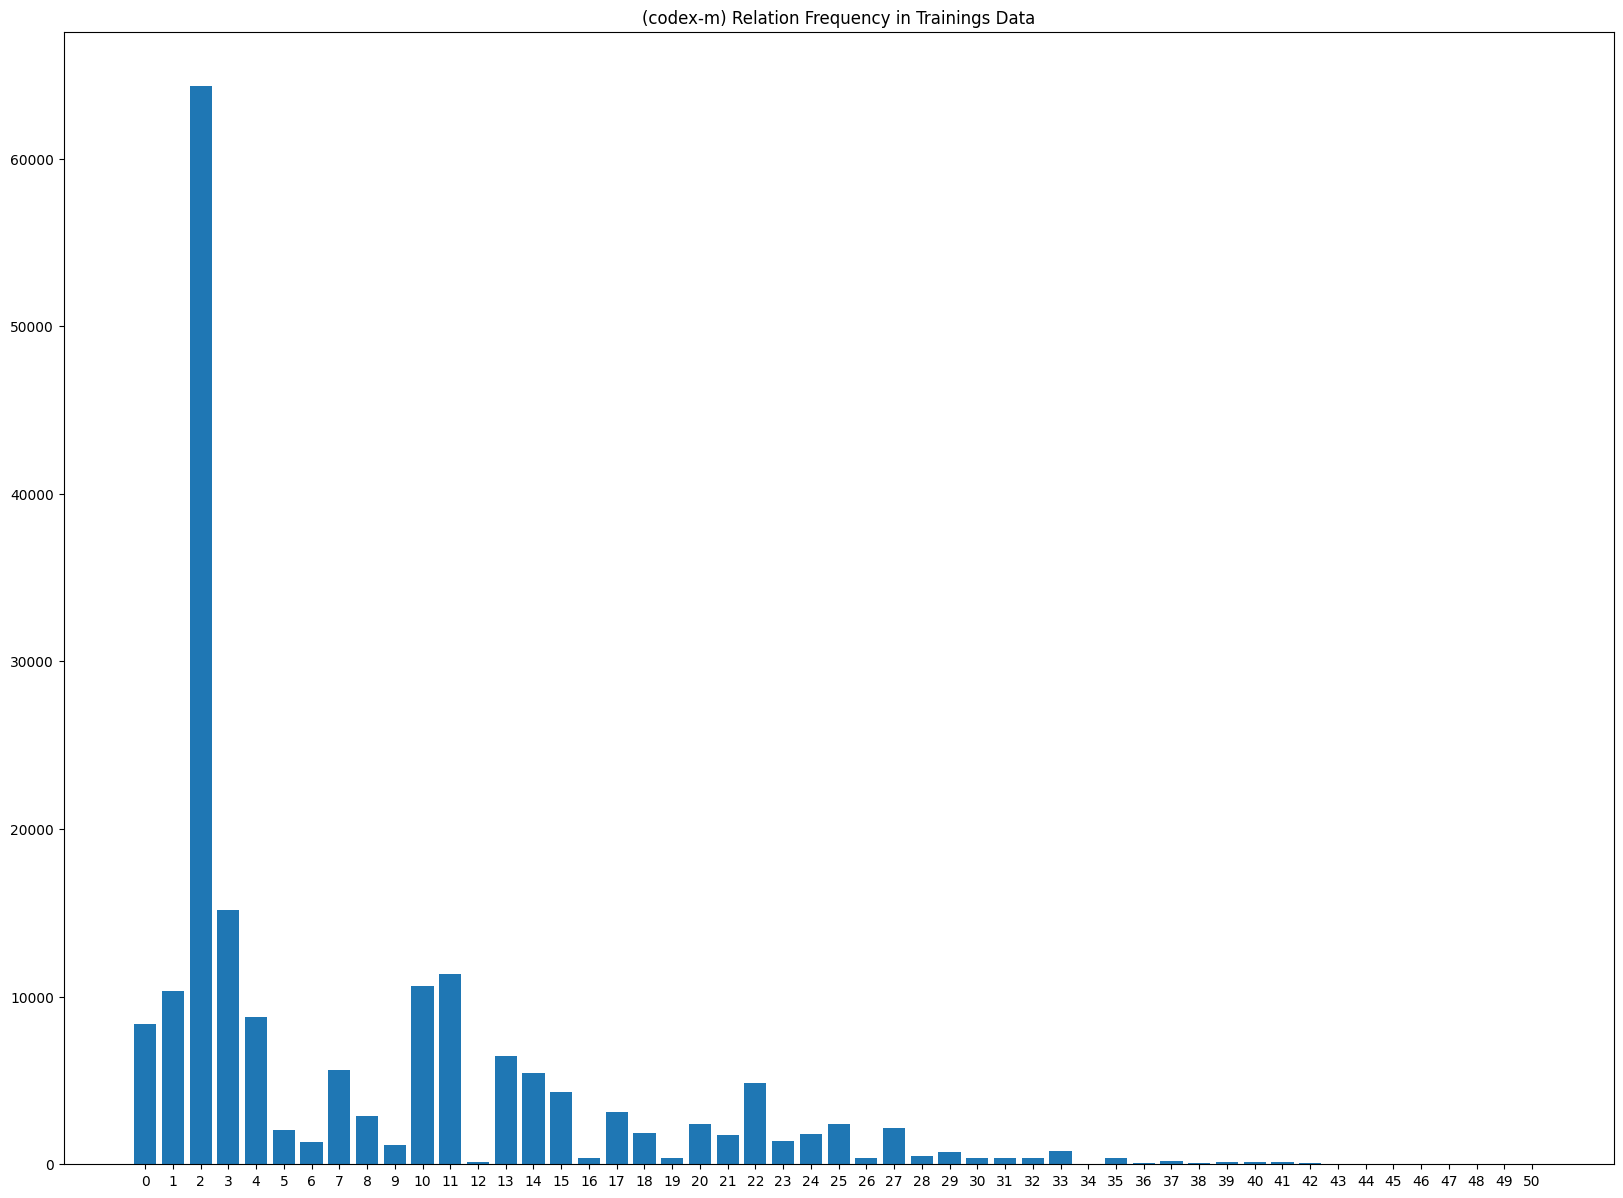

In [128]:
show_relation_frequency(dataset_name)

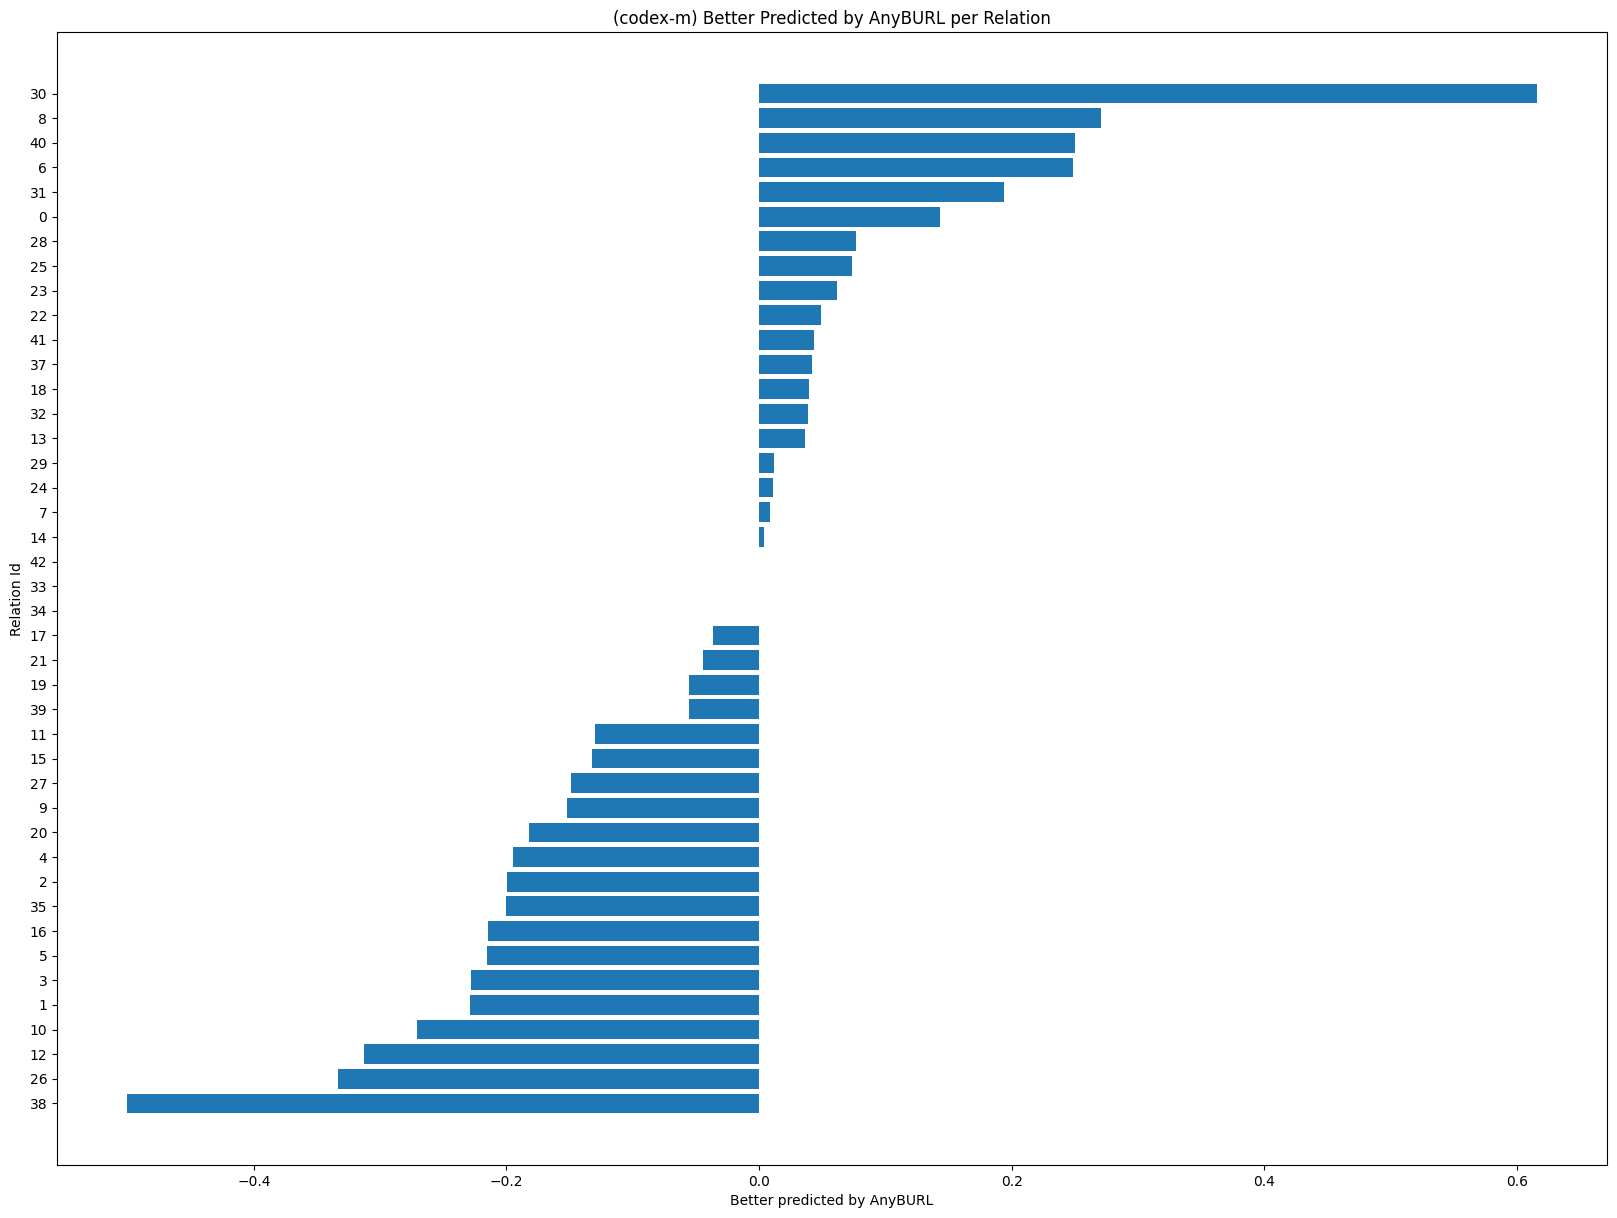

In [129]:
show_better_predicted_per_relation(df, bp_threshold)

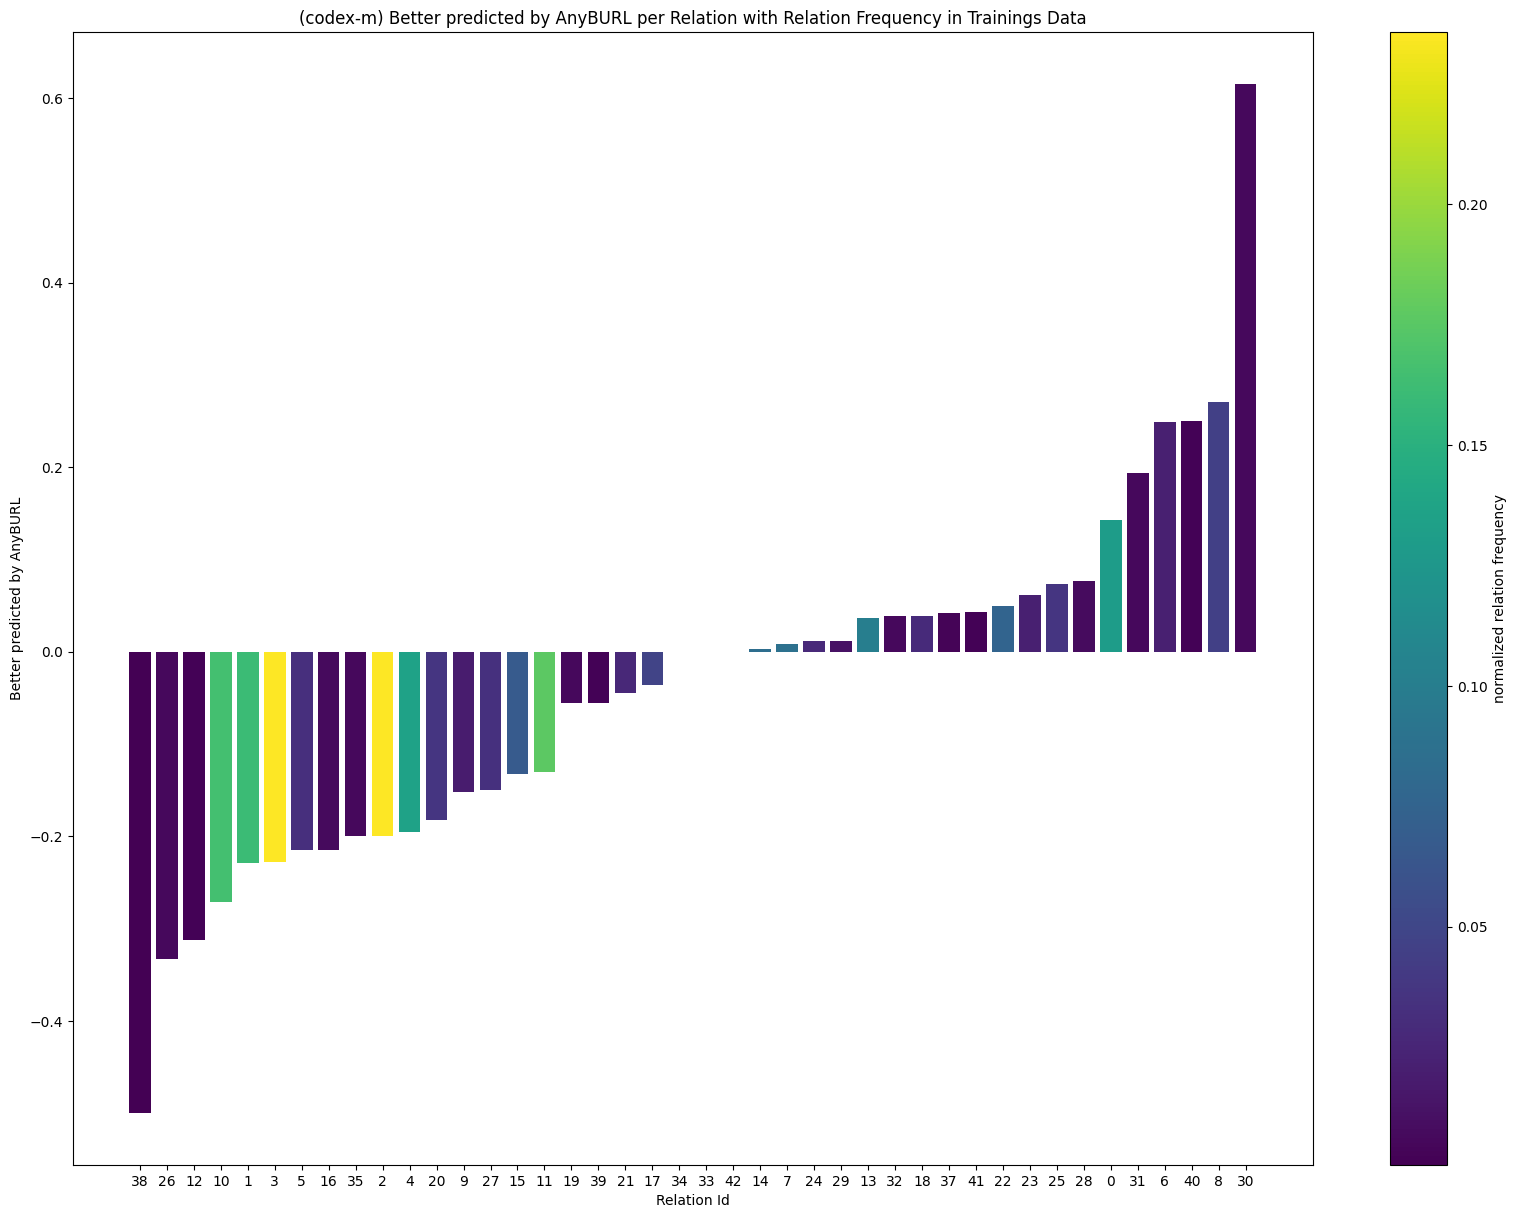

In [130]:
show_better_predicted_per_relation_with_frequency(df, bp_threshold, dataset_name)

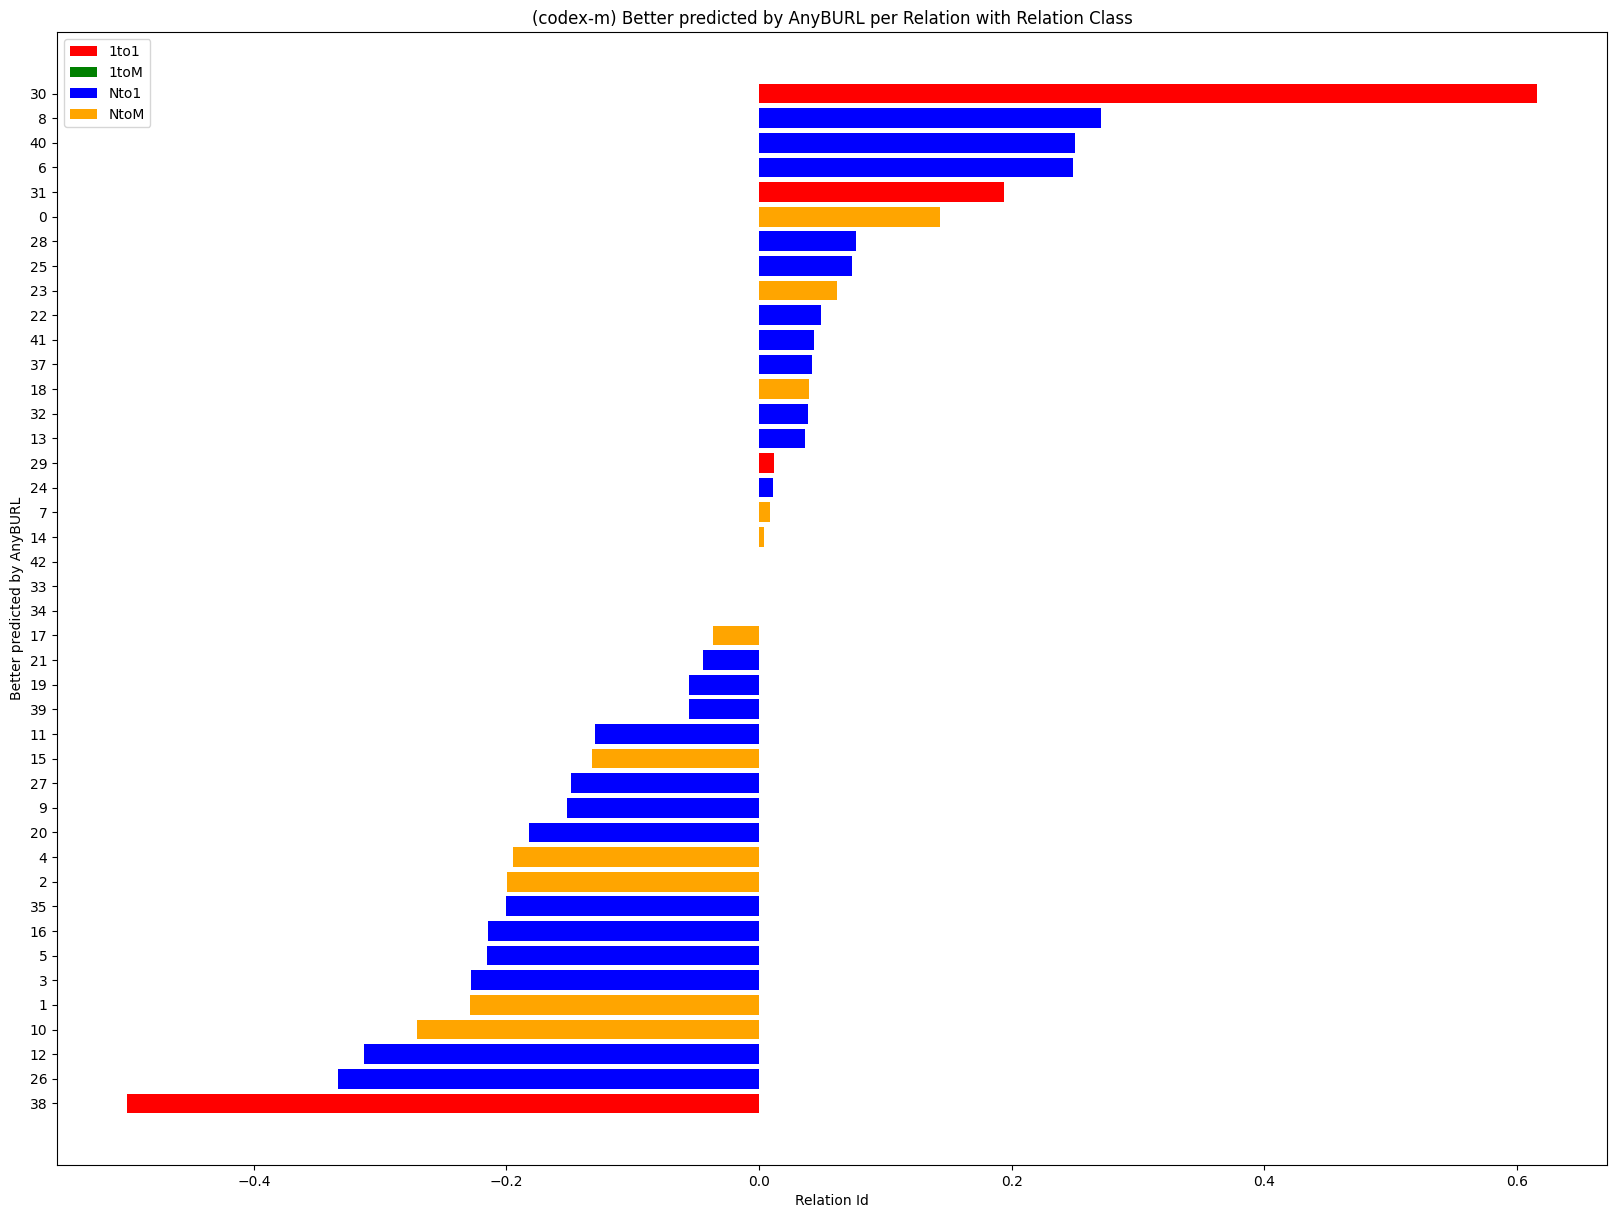

In [131]:
show_better_predicted_per_relation_with_relation_classes(df, bp_threshold, dataset_name, relation_classes_threshold)

## close PDF

In [132]:
pdf.close()